# Laboratorium 2


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
import json as js
import random

class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes

    def set_axis(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in scenes[self.i].points:
            if len(collection.points) > 0:
                self.ax.scatter(*zip(*(np.array(collection.points))), c=collection.color, marker=collection.marker)
        for collection in scenes[self.i].lines:
            self.ax.add_collection(collection.get_collection())
        self.ax.autoscale()
        plt.draw()

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker

class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, colors=mcolors.to_rgba(self.color))
        else:
            return mcoll.LineCollection(self.lines)
            


class Plot:
    def __init__(self, scenes = [], json = None):
        if json is None:
            self.scenes = scenes
        else:
            self.scenes = [Scene([PointsCollection(pointsCol) for pointsCol in scene["points"]], 
                                 [LinesCollection(linesCol) for linesCol in scene["lines"]]) 
                           for scene in js.loads(json)]
        
    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        axprev = plt.axes([0.6, 0.05, 0.15, 0.075])
        axnext = plt.axes([0.76, 0.05, 0.15, 0.075])
        bnext = Button(axnext, 'Następny')
        bnext.on_clicked(callback.next)
        bprev = Button(axprev, 'Poprzedni')
        bprev.on_clicked(callback.prev)
        return [bprev, bnext]

    def draw(self):
        plt.close()
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        callback.set_axis(plt.axes())
        plt.show()
        callback.draw()
        
    def toJSON(self):
        return js.dumps([{"points": [pointCol.points.tolist() for pointCol in scene.points], 
                          "lines":[linesCol.lines for linesCol in scene.lines]} 
                         for scene in self.scenes])
    

### Przykład użycia

<IPython.core.display.Javascript object>


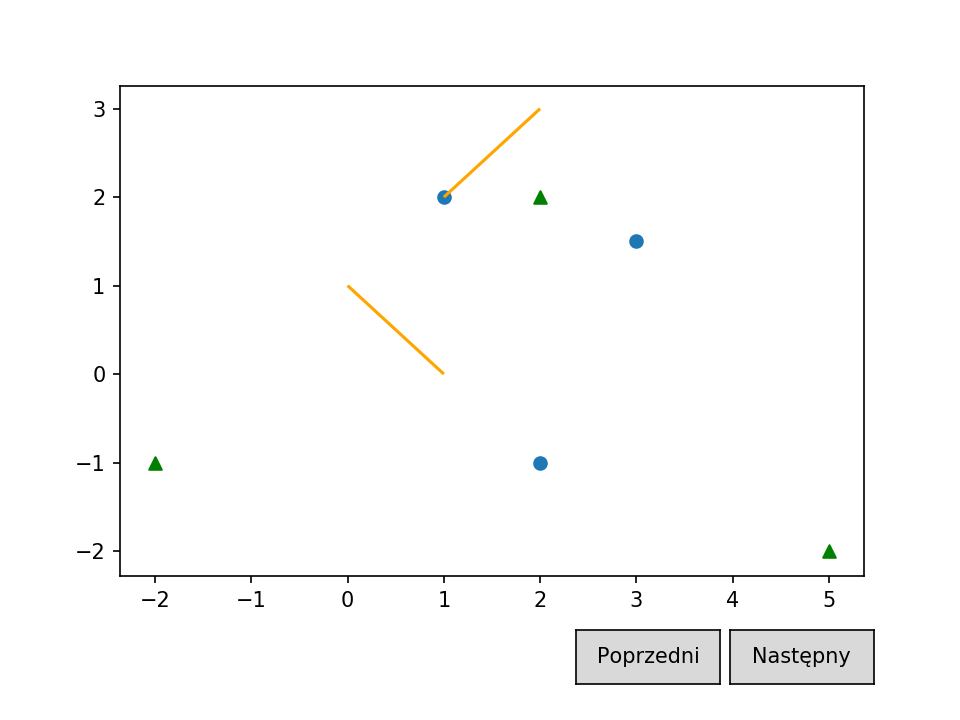

In [3]:
%matplotlib notebook

scenes=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
               PointsCollection([(5, -2), (2, 2), (-2, -1)], 'green', marker = "^")], 
              [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]], 'orange')]), 
        Scene([PointsCollection([(1, 2), (-15, 1.5), (2, -1)], 'red'), 
               PointsCollection([(5, -2), (2, 2), (-2, 1)], 'black')], 
              [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

plot = Plot(scenes)
plot.draw() 


### Rozwiązanie

### Zadanie 1

In [4]:
%matplotlib notebook

def generate100RandomPointsBetween_100And100():
    #points = PointsCollection([(random.uniform(-100, 100), random.uniform(-100, 100)) for i in range(100)])
    points = [(random.uniform(-100, 100), random.uniform(-100, 100)) for i in range(100)]
    return points
    
def generate100RandomPointsOnCircleOf10Radius():
    R = 10
    random_fi = [random.uniform(0, 2*np.pi) for i in range(100)]
    #points = PointsCollection([(10*np.cos(t), 10*np.sin(t)) for t in random_fi])
    points = [(10*np.cos(t), 10*np.sin(t)) for t in random_fi]
    return points
    
def generate100RandomPointsOnRectangle():
    x1 = (-10, -10)
    x2 = (10, -10)
    y1 = (-10, 10)
    
    v1 = (0, 20)
    v2 = (20, 0)
    
    preparing_points = []
    
    for index in range(100):
        t = random.randint(0, 1000)
    
        if t < 250:
            new_point = (x1[0], x1[1]+v1[1]*random.uniform(0, 1))
        elif t < 500:
            new_point = (x2[0], x2[1]+v1[1]*random.uniform(0, 1))
        elif t < 750:
            new_point = (x1[0]+v2[0]*random.uniform(0, 1), x1[1])
        else:
            new_point = (y1[0]+v2[0]*random.uniform(0, 1), y1[1])
        
        preparing_points.append(new_point)
    #points = PointsCollection(preparing_points)
    return preparing_points

def generate49RandomPointsOnSquare():
    x1 = (0,0)
    x2 = (10, 0)
    y2 = (10, 10)
    y1 = (0, 10)
    preparing_points = [x1, x2, y2, y1]
    
    preparing_points += generate25RandomPointsOnAxises()
    preparing_points += generate20PointsOnDiagonals()
    
    #points = PointsCollection(preparing_points)
    return preparing_points

def generate25RandomPointsOnAxises():
    preparing_points = []
    for i in range(25):
        t = random.uniform(-100, 100)
    
        if t < 0:
            new_point_x = (np.sign(t)*t)%11
            if new_point_x > 10:
                new_point_x -= random.uniform(1, 9)
            preparing_points.append((new_point_x,0))
        else:
            new_point_y = (np.sign(t)*t)%11
            if new_point_y > 10:
                new_point_y -= random.uniform(1, 9)
            preparing_points.append((0, new_point_y)) 
    return preparing_points
    
def generate20PointsOnDiagonals():
    x1 = (0,0)
    x2 = (10, 0)
    diagonal_vector1 = (10, 10)
    diagonal_vector2 = (-10, 10)
    preparing_points = []
    
    for i in range(20):
        random_number = random.uniform(-100, 100)
        t = random.uniform(0, 1)

        if random_number < 0:
            point = (x1[0] + t*diagonal_vector1[0], x1[1]+t*diagonal_vector1[1])
        else:
            point = (x2[0] + t*diagonal_vector2[0], x2[1]+t*diagonal_vector2[1])
        preparing_points.append(point)
    return preparing_points



### Zadanie 2

<IPython.core.display.Javascript object>


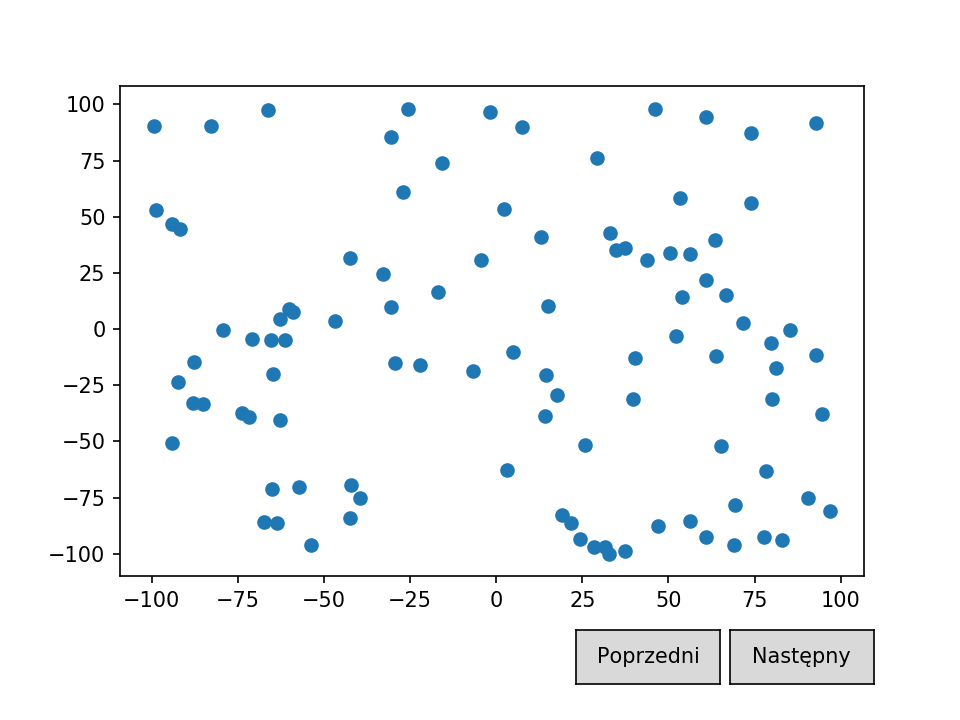

In [5]:
%matplotlib notebook

randomPoints = PointsCollection(generate100RandomPointsBetween_100And100())
circlePoints = PointsCollection(generate100RandomPointsOnCircleOf10Radius())
rectangularPoints = PointsCollection(generate100RandomPointsOnRectangle())
squarePoints = PointsCollection(generate49RandomPointsOnSquare())

scenes = [Scene([randomPoints]), Scene([circlePoints]), Scene([squarePoints]), Scene([rectangularPoints])]

plot = Plot(scenes)

plot.draw()

### Zadanie 3

In [6]:
%matplotlib notebook

def generateRandomPoints(no_points, lower_limit, upper_limit):
    #points = PointsCollection([(random.uniform(lower_limit, upper_limit), random.uniform(lower_limit, upper_limit)) for i in range(no_points)])
    points = [(random.uniform(lower_limit, upper_limit), random.uniform(lower_limit, upper_limit)) for i in range(no_points)]
    return points


def generateRandomPointsOnCircle(no_points, circle_center, radius):
    random_fi = [random.uniform(0, 2*np.pi) for i in range(no_points)]
    #points = PointsCollection([(radius*np.cos(t)+circle_center[0], radius*np.sin(t)+circle_center[1]) for t in random_fi])
    points = [(radius*np.cos(t)+circle_center[0], radius*np.sin(t)+circle_center[1]) for t in random_fi]
    return points


def generateRandomPointsOnRectangle(no_points, rect_vertices):
    base_point = rect_vertices[0]
    rect_vertices = sortPointsByDistanceTo(rect_vertices, base_point)
    
    vector_of_rect1 = createVector(base_point, rect_vertices[1])
    vector_of_rect2 = createVector(base_point, rect_vertices[2])
    
    prepared_points = []
    
    for i in range(no_points):
        fi = random.uniform(0, 1000)
            
        if fi < 250:
            t = random.uniform(0, 1)
            new_point = (rect_vertices[0][0] + vector_of_rect1[0]*t, rect_vertices[0][1] + vector_of_rect1[1]*t)
        elif fi < 500:
            t = random.uniform(0, 1)
            new_point = (rect_vertices[0][0] + vector_of_rect2[0]*t, rect_vertices[0][1] + vector_of_rect2[1]*t)
        elif fi < 750: 
            t = random.uniform(0, 1)
            new_point = (rect_vertices[1][0] + vector_of_rect2[0]*t, rect_vertices[1][1] + vector_of_rect2[1]*t)
        else:
            t = random.uniform(0, 1)
            new_point = (rect_vertices[2][0] + vector_of_rect1[0]*t, rect_vertices[2][1] + vector_of_rect1[1]*t)
        prepared_points.append(new_point)
    
    #points = PointsCollection(prepared_points)
    return prepared_points


def sortPointsByDistanceTo(points, reference_point):
    distances = []
    
    for point in points:
        vector = createVector(reference_point, point)
        distance = vectorLength(vector)
        distances.append(distance)
    
    for index1 in range(len(points)):
        for index2 in range(index1, len(points)):
            if distances[index1] > distances[index2]:
                distances[index1], distances[index2] = distances[index2], distances[index1]
                points[index1], points[index2] = points[index2], points[index1] 
    
    return points


def createVector(point1, point2):
    return (point2[0]-point1[0], point2[1]-point1[1])


def vectorLength(vector):
    return np.sqrt(vector[0]**2 + vector[1]**2)
      
    
def generateRandomPointsOnSquare(sqr_vertices, no_points_on_axises, no_points_on_diagonals):
    prepared_points = sqr_vertices.copy()
    
    #prepared_points += generateRandomPointsOnAxises(sqr_vertices, no_points_on_axises)
    prepared_points += generateRandomPointsOnDiagonals(sqr_vertices, no_points_on_diagonals)
    
    #points = PointsCollection(prepared_points)
    return prepared_points

    
def generateRandomPointsOnAxises(sqr_vertices, no_points):
    print(0)

    
def generateRandomPointsOnDiagonals(sqr_vertices, no_points):
    base_point1 = sqr_vertices[0]
    sqr_vertices = sortPointsByDistanceTo(sqr_vertices, base_point1)
    
    base_point2 = sqr_vertices[1]
    vector_of_diag1 = createVector(base_point1, sqr_vertices[3])
    vector_of_diag2 = createVector(base_point2, sqr_vertices[2])
    
    prepared_points = []
    
    for i in range(no_points):
        fi = random.uniform(-100, 100)
        t = random.uniform(0, 1)
        
        if fi > 0:
            new_point = (base_point1[0] + vector_of_diag1[0]*t, base_point1[1] + vector_of_diag1[1]*t)
        else:
            new_point = (base_point2[0] + vector_of_diag2[0]*t, base_point2[1] + vector_of_diag2[1]*t)
       
        prepared_points.append(new_point)
    
    return prepared_points

### Zadanie 3 - wizualizacja

<IPython.core.display.Javascript object>


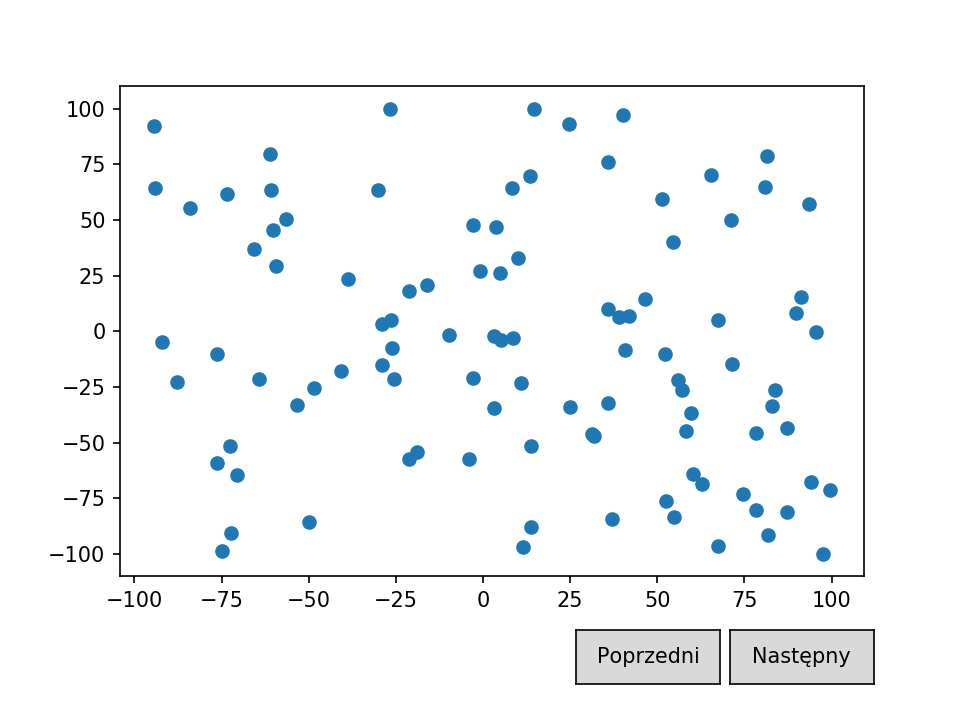

In [7]:
%matplotlib notebook

randomPoints = PointsCollection(generateRandomPoints(100, -100, 100))
circlePoints = PointsCollection(generateRandomPointsOnCircle(100, (5, 10), 5))
rectangularPoints = PointsCollection(generateRandomPointsOnRectangle(100, [(-10, -10), (-10, 10), (10, -10), (10, 10)]))
squarePoints = PointsCollection(generateRandomPointsOnSquare([(0, 0), (10, 0), (10, 10), (0, 10)], 20, 25))

scenes = [Scene([randomPoints]), Scene([circlePoints]), Scene([rectangularPoints]), Scene([squarePoints])]

plot = Plot(scenes)

plot.draw()

### Zadanie 4 - przygotowanie

In [19]:
def findReferencePoint(points):
    reference_point = (np.inf, np.inf)
    
    for point in points:
        if point[1] < reference_point[1]:
            reference_point = point
        elif point[1] == reference_point[1] and point[0] < reference_point[0]:
            reference_point = point
    
    return reference_point


def radiansToDegrees(angle):
    return (angle*360)/(2*np.pi)


def countAngleBetween(vector1, vector2):
    if vector1 == [0,0] or vector2 == [0,0]:
        return 0
    cos_angle = scalarProductOf(vector1, vector2)/(vectorLength(vector1)*vectorLength(vector2))
    return np.arccos(cos_angle)
    
    
def scalarProductOf(vector1, vector2):
    return (vector1[0]*vector2[0]+vector1[1]*vector2[1])


def vectorLength(vector1):
    return np.sqrt(vector1[0]**2 + vector1[1]**2)


def distanceBetween(point1, point2):
    x_diff = point2[0]-point1[0]
    y_diff = point2[1]-point1[1]
    
    return np.square(x_diff**2 + y_diff**2)


def makeLinesOutOfPoints(points):
    lines = []
    
    for index in range(len(points)-1):
        point1 = points[index]
        point2 = points[index+1]
        lines.append([point1, point2])
    
    lines.append([points[-1], points[0]])
    
    return lines


### Zadanie 4 - algorytm Grahama

In [20]:
%matplotlib notebook

# points - list of points
def algorithmGraham(points):
    visualization = []
    
    reference_point = findReferencePoint(points)
    points.remove(reference_point)
    
    points = sorted(points, key=lambda point: angleWithXAxis(reference_point, point))
    removeDuplicatedAngles(points, reference_point)
    
    areola = []
    areola.append(reference_point)
    areola.append(points[0])
    areola.append(points[1])
    
    visualization.append([deepcopy(areola), points])
    
    index = 2
    while index < len(points):
        visualization.append([deepcopy(areola), points[index]])
        if isOnLeftFromLastPoints(areola, points[index]):
            areola.append(points[index])
            index += 1
        else:
            areola.pop()
    
    visualization.append([deepcopy(areola)])
    
    return (areola, visualization)


def getAngleWithXAxis(ref_point, point):
    x = point[0] - ref_point[0]
    y = point[1] - ref_point[1]
    angle = np.arctan2(y, x)
    if angle < 0:
        angle += 2*np.pi
    return angle


def angleWithXAxis(point1, point2):  #additional condition: if angle == 0 or 180 then check coordinates
    vector = [point2[0]-point1[0], point2[1]-point1[1]]
    i_vector = [1, 0]
    return radiansToDegrees(countAngleBetween(vector, i_vector))


def removeDuplicatedAngles(points, reference_point):
    epsilon = 10**(-8)
    
    for index in range(len(points)-1):
        if index+1 < len(points):
            point1 = points[index]
            point2 = points[index+1]
            if angleWithXAxis(reference_point, point1) - angleWithXAxis(reference_point, point2) < epsilon:
                if distanceBetween(reference_point, point1) > distanceBetween(reference_point, point2):
                    points.remove(point2)
                else:
                    points.remove(point1)

    return points


def isOnLeftFromLastPoints(areola, point):
    epsilon = 10**(-10)
    point1 = areola[-2]
    point2 = areola[-1]
    matrix = [[point1[0], point1[1], 1],[point2[0], point2[1], 1],[point[0], point[1], 1]]
    determinant = np.linalg.det(matrix)
    
    return determinant > epsilon


### Zadanie 4 - wizualizacja algorytmu Grahama

<IPython.core.display.Javascript object>


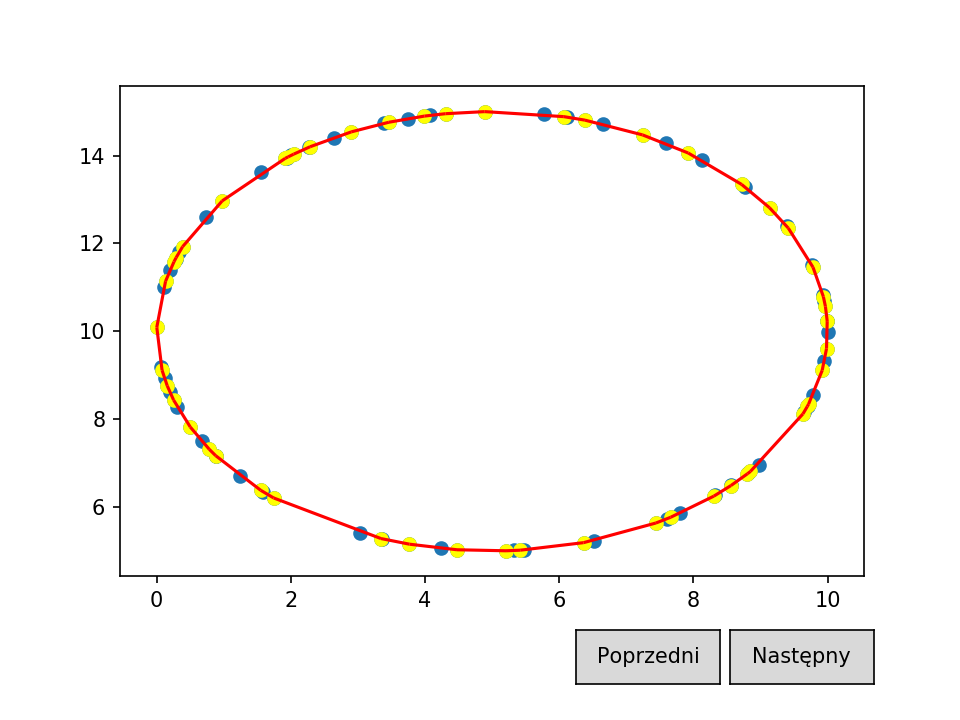

In [34]:
%matplotlib notebook
from copy import deepcopy

def visualizeGrahamAlgorithm(vis, list_of_points):
    init_points = PointsCollection(list_of_points)
    scenes = [Scene([init_points])]
    
    [areola, cons_points] = vis[0]
    considered_points = PointsCollection(cons_points, color = 'green')
    
    areola_lines = makeLinesOutOfPoints(areola)
    areola_lines.pop()
    scene = Scene([init_points, considered_points, 
                   PointsCollection(areola, color = 'yellow')], [LinesCollection(areola_lines, color='orange')])
    scenes.append(scene)
    
    for index in range(1, len(vis)-1):
        [areola, curr_point] = vis[index]
        areola_lines = makeLinesOutOfPoints(areola)
        areola_lines.pop()
        scene = Scene([init_points, considered_points,
                      PointsCollection(areola, color='yellow'), PointsCollection([curr_point], color='cyan')],
                     [LinesCollection(areola_lines, color='orange')])
        scenes.append(scene)
    
    [areola] = vis[-1]
    points_of_aureola = PointsCollection(areola, color='yellow')
    lines_of_aureola = LinesCollection(makeLinesOutOfPoints(areola), color='red')

    scenes.append(Scene([init_points,points_of_aureola], [lines_of_aureola]))
    
    return scenes


#points_for_areola = generateRandomPoints(100, -100, 100)
points_for_areola = generateRandomPointsOnCircle(100, (5, 10), 5)
#points_for_areola = generateRandomPointsOnRectangle(100, [(-10, -10), (-10, 10), (10, -10), (10, 10)])
#points_for_areola = generate49RandomPointsOnSquare()  # rzuca sie przy funkcji isOnLeft
#points_for_areola = generateRandomPointsOnSquare([(0, 0), (10, 0), (10, 10), (0, 10)], 20, 25)   # coś nie do końca dokładnie
init_points = deepcopy(points_for_areola)
(areola, vis) = algorithmGraham(points_for_areola)

scenes = visualizeGrahamAlgorithm(vis, init_points)

plot = Plot(scenes)

plot.draw()


### Zadanie 4 - algorytm Jarvisa

In [51]:
%matplotlib notebook

def jarvisAlgorithm(list_of_points):
    visualizator_args = [deepcopy(list_of_points)]
    
    curr_point = findReferencePoint(list_of_points)
    prev_point = (curr_point[0]-10, curr_point[1])
    
    areola = [curr_point]
    
    while True:
        next_point = curr_point
        min_angle = np.inf
        vector1 = [curr_point[0]-prev_point[0], curr_point[1]-prev_point[1]]
        for point in list_of_points:
            vector2 = [point[0]-curr_point[0],point[1]-curr_point[1]]
            angle = radiansToDegrees(countAngleBetween(vector1, vector2))
            if angle < min_angle and point != curr_point and point!= prev_point:
                next_point = point
                min_angle = angle
        visualizator_args.append([deepcopy(areola), prev_point, curr_point, next_point])
        areola.append(next_point)
        prev_point, curr_point = curr_point, next_point
        if curr_point == areola[0]:
            break
    
    visualizator_args.append(areola)
    
    return (areola, visualizator_args)

### Zadanie 4 - wizualizacja algorytmu Jarvisa

C:\Users\pastu\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in arccos


<IPython.core.display.Javascript object>


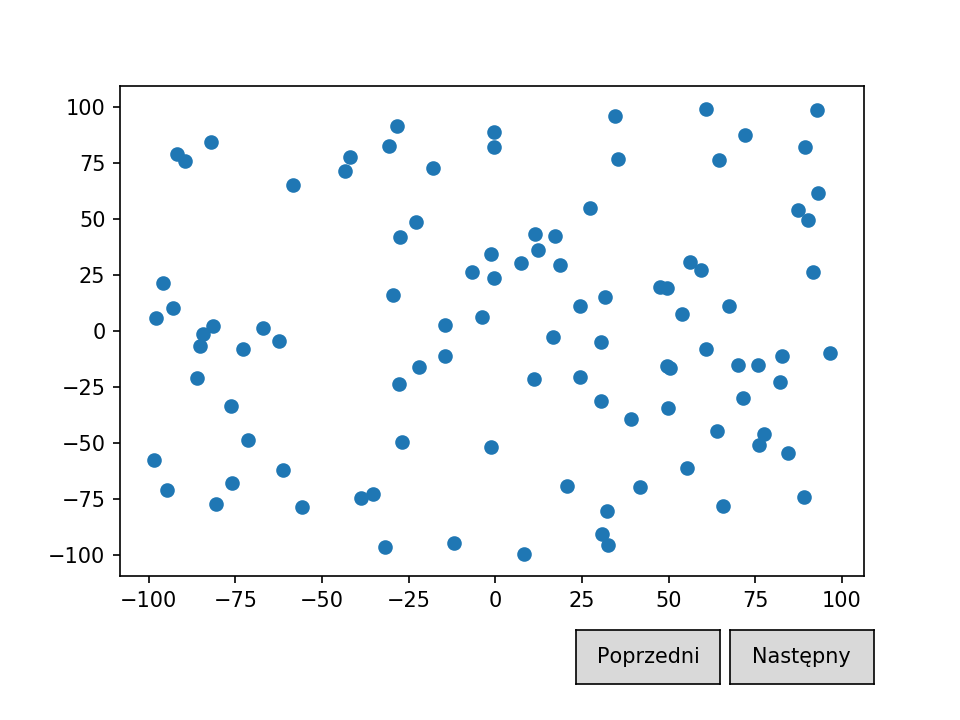

0.14641130000018165


In [60]:
%matplotlib notebook


def visualizeGrahamAlgorithm(vis):
    init_points = PointsCollection(vis[0])
    
    scenes = [Scene([init_points])]
    
    for index in range(1, len(vis)-1):
        [areola, prev_point, curr_point, next_point] = vis[index]
        areola_lines = makeLinesOutOfPoints(areola)
        areola_lines.pop()
        scene = Scene([init_points, PointsCollection(areola, color='yellow'), 
                       PointsCollection([curr_point], color='cyan'), PointsCollection([prev_point], color='blue'),
                      PointsCollection([next_point], color='orange')],
                      [LinesCollection(areola_lines, color='red')]
                      )
        scenes.append(scene)
    
    areola = vis[-1]
    areola_lines = makeLinesOutOfPoints(areola)
    scene = Scene([init_points, PointsCollection(areola, color = 'yellow')], [LinesCollection(areola_lines, color='red')])
    scenes.append(scene)
    
    return scenes

points_for_areola = generateRandomPoints(100, -100, 100)
#points_for_areola = generateRandomPointsOnCircle(100, (5, 10), 5)
#points_for_areola = generateRandomPointsOnRectangle(100, [(-10, -10), (-10, 10), (10, -10), (10, 10)])
#points_for_areola = generate49RandomPointsOnSquare()  # rzuca sie przy funkcji isOnLeft
#points_for_areola = generateRandomPointsOnSquare([(0, 0), (10, 0), (10, 10), (0, 10)], 20, 25)

(areola, visualizator) = jarvisAlgorithm(points_for_areola)
scenes = visualizeGrahamAlgorithm(visualizator)

plot = Plot(scenes)

plot.draw()


### Zadanie 5 - Porównanie czasów działania

In [69]:
import time

points = generate100RandomPointsBetween_100And100()
circle_points = generate100RandomPointsOnCircleOf10Radius()
#rect_points = generate100RandomPointsOnRectangle()
#square_points = generate49RandomPointsOnSquare()
#static_points = [points, circle_points, rect_points, square_points]
static_points = [points, circle_points]

random_points = generateRandomPoints(100, -100, 100)
circle_rand_points = generateRandomPointsOnCircle(100, (5, 10), 5)
#rect_rand_points = generateRandomPointsOnRectangle(100, [(-10, -10), (-10, 10), (10, -10), (10, 10)])
square_rand_points = generateRandomPointsOnSquare([(0, 0), (10, 0), (10, 10), (0, 10)], 20, 25)
#random_points = [random_points, circle_rand_points, rect_rand_points, square_rand_points]
random_points = [random_points, circle_rand_points, square_rand_points]

graham_times = [[],[]]
jarvis_times = [[],[]]
for list_of_points in static_points:
    start = time.process_time_ns()
    algorithmGraham(list_of_points)
    end = time.process_time_ns()
    graham_times[0].append(end-start)
    start = time.process_time_ns()
    jarvisAlgorithm(list_of_points)
    end = time.process_time_ns()
    jarvis_times[0].append(end-start)

for list_of_points in random_points:
    start = time.process_time_ns()
    algorithmGraham(list_of_points)
    end = time.process_time_ns()
    graham_times[1].append(end-start)
    start = time.process_time_ns()
    jarvisAlgorithm(list_of_points)
    end = time.process_time_ns()
    jarvis_times[1].append(end-start)
    

print("Punkty wygenerowane z zadania 1:")
print("Chmura punktów: ", "algorytm Grahama:", graham_times[0][0], "algorytm Jarvisa: ", jarvis_times[0][0], "ns")
print("Punkty na okręgu: ", "algorytm Grahama:", graham_times[0][1], "algorytm Jarvisa: ", jarvis_times[0][1], "ns")
#print("Punkty na prostokącie: ", "algorytm Grahama:", graham_times[0][2], "algorytm Jarvisa: ", jarvis_times[0][2], "ns")
#print("Punkty na kwadracie: ", "algorytm Grahama:", graham_times[0][3], "algorytm Jarvisa: ", jarvis_times[0][3], "ns")
    
print("Punkty wygenerowane z zadania 3:")
print("Chmura punktów: ", "algorytm Grahama:", graham_times[1][0], "algorytm Jarvisa: ", jarvis_times[1][0], "ns")
print("Punkty na okręgu: ", "algorytm Grahama:", graham_times[1][1], "algorytm Jarvisa: ", jarvis_times[1][1], "ns")
#print("Punkty na prostokącie: ", "algorytm Grahama:", graham_times[1][2], "algorytm Jarvisa: ", jarvis_times[1][2], "ns")
print("Punkty na kwadracie: ", "algorytm Grahama:", graham_times[1][2], "algorytm Jarvisa: ", jarvis_times[1][2], "ns")
    
#start = time.process_time()
#plot.draw()
#end = time.process_time()
#total = end-start
#print(total)

C:\Users\pastu\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in arccos


Punkty wygenerowane z zadania 1:
Chmura punktów:  algorytm Grahama: 46875000 algorytm Jarvisa:  46875000 ns
Punkty na okręgu:  algorytm Grahama: 62500000 algorytm Jarvisa:  250000000 ns
Punkty wygenerowane z zadania 3:
Chmura punktów:  algorytm Grahama: 15625000 algorytm Jarvisa:  15625000 ns
Punkty na okręgu:  algorytm Grahama: 31250000 algorytm Jarvisa:  234375000 ns
Punkty na kwadracie:  algorytm Grahama: 0 algorytm Jarvisa:  0 ns
